# Evaluate Molecular Generation Results

In [ ]:
#ssh -L 8090:localhost:8090 node802

In [ ]:
!conda env list

## compare the of csv and hdf files

In [3]:
csv_path = "<PATH>/led3_score/3_molecular_generation/2_evaluate_molecules/full_model/led3_building_blocks/Q99685_Led3_caspyrus_10k/LED_BB_Q99685_Led3_caspyrus_10k_FULL_MODEL_results.csv"

# load csv but dont read the trees column with pandas
import pandas 
csv_result = pandas.read_csv(csv_path, usecols = ["target","search_time","first_solution_time","first_solution_iteration","number_of_nodes","max_transforms","max_children","number_of_routes","number_of_solved_routes","top_score","is_solved","number_of_steps","number_of_precursors","number_of_precursors_in_stock","precursors_in_stock","precursors_not_in_stock","precursors_availability","policy_used_counts","profiling","top_scores"])
csv_result.head()

,target,search_time,first_solution_time,first_solution_iteration,number_of_nodes,max_transforms,max_children,number_of_routes,number_of_solved_routes,top_score,is_solved,number_of_steps,number_of_precursors,number_of_precursors_in_stock,precursors_in_stock,precursors_not_in_stock,precursors_availability,policy_used_counts,profiling,top_scores
0,O=C(OC(C(F)(F)F)C(F)(F)F)N1CCN(Cc2ccccc2)CC1,0.868079,0.868016,1,4,3,1,1,1,0.986553,True,3,4,4,"O=C(OC(Cl)(Cl)Cl)OC(Cl)(Cl)Cl, OC(C(F)(F)F)C(F...",NaN,led3;led3;led3;led3,{'uspto': 3},"{'expansion_calls': 3, 'reactants_generations'...","0.9866, 0.6810, 0.6774, 0.0491"
1,O=C(N1CCC(c2ccccc2CC(Cl)C=CC2(F)NNC2=S)CC1)n1n...,900.979861,0.000000,0,7029,10,23,2431,0,0.855899,False,8,10,9,"CC1(C)OB(B2OC(C)(C)C(C)(C)O2)OC1(C)C, CC(C)(C)...",O=C(Cl)C=CC1(F)NNC1=O,led3;led3;led3;led3;led3;led3;led3;led3;led3;N...,{'uspto': 7028},"{'expansion_calls': 4598, 'reactants_generatio...","0.8559, 0.8553, 0.8551, 0.8468, 0.8468, 0.8468..."
2,O=C(N1CCN(Cc2cnccc2-c2ccccc2)CC1)n1nnc2ccccc21,17.310348,17.310285,5,69,10,5,22,1,0.963447,True,5,6,6,"CC(C)(C)OC(=O)N1CCNCC1, OB(O)c1ccccc1, Brc1ccn...",NaN,led3;led3;led3;led3;led3;led3,{'uspto': 68},"{'expansion_calls': 49, 'reactants_generations...","0.9634, 0.8202, 0.8152, 0.8146, 0.8144, 0.8144..."
3,O=C(Cc1ccc2scnc2c1)CN1CCN(C(=O)n2nnc3ccccc32)CC1,446.860759,446.860670,211,2530,10,23,435,1,0.975000,True,4,6,6,"C1CNCCN1, ClCCl, O=C(Cl)CCCl, Sc1nc2ccccc2s1, ...",NaN,led3;led3;led3;led3;led3;led3,{'uspto': 2529},"{'expansion_calls': 2106, 'reactants_generatio...","0.9750, 0.8446, 0.8446, 0.8336, 0.8336"
4,O=Cn1nnc(CN2CCN(C(=O)n3nnc4ccccc43)CC2)n1,900.869223,0.000000,0,2633,10,22,691,0,0.844779,False,9,9,8,"O=C1NC(=O)c2ccccc21, O=C(Cl)Oc1ccc([N+](=O)[O-...",O=Cn1nnc(C(=O)O)n1,led3;led3;led3;led3;led3;led3;led3;led3;Not in...,{'uspto': 2632},"{'expansion_calls': 2027, 'reactants_generatio...","0.8448, 0.8446, 0.8446, 0.8446, 0.8446, 0.8446"


In [4]:
from multiretro.utils.io import DataReader

from typing import List

def load_values(paths: List[str], key: str = "table"):
    joined_df = None
    for path in paths:
        data_hdf = DataReader.load_hdf(path, key= key)
        if joined_df is None:
            joined_df = data_hdf
        else:
            joined_df = joined_df.append(data_hdf)
            
        joined_df.reset_index(drop=True, inplace=True)
    print(joined_df.columns)
    return joined_df

In [5]:
result_hdf_path = ["<PATH>/led3_score/3_molecular_generation/2_evaluate_molecules/full_model/led3_building_blocks/Q99685_Led3_caspyrus_10k/LED_BB_Q99685_Led3_caspyrus_10k_FULL_MODEL_results.csv_0_.hdf", "<PATH>/led3_score/3_molecular_generation/2_evaluate_molecules/full_model/led3_building_blocks/Q99685_Led3_caspyrus_10k/LED_BB_Q99685_Led3_caspyrus_10k_FULL_MODEL_results.csv_1_.hdf"]
hdf_results = load_values(result_hdf_path)
hdf_results.head()

Index(['index', 'target', 'search_time', 'first_solution_time',
       'first_solution_iteration', 'number_of_nodes', 'max_transforms',
       'max_children', 'number_of_routes', 'number_of_solved_routes',
       'top_score', 'is_solved', 'number_of_steps', 'number_of_precursors',
       'number_of_precursors_in_stock', 'precursors_in_stock',
       'precursors_not_in_stock', 'precursors_availability',
       'policy_used_counts', 'profiling', 'top_scores', 'trees'],
      dtype='object')


<PATH>/1051143/ipykernel_158736/1801331223.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  joined_df = joined_df.append(data_hdf)


,index,target,search_time,first_solution_time,first_solution_iteration,number_of_nodes,max_transforms,max_children,number_of_routes,number_of_solved_routes,...,number_of_steps,number_of_precursors,number_of_precursors_in_stock,precursors_in_stock,precursors_not_in_stock,precursors_availability,policy_used_counts,profiling,top_scores,trees
0,0,O=C(OC(C(F)(F)F)C(F)(F)F)N1CCN(Cc2ccccc2)CC1,0.868079,0.868016,1,4,3,1,1,1,...,3,4,4,"O=C(OC(Cl)(Cl)Cl)OC(Cl)(Cl)Cl, OC(C(F)(F)F)C(F...",,led3;led3;led3;led3,{'uspto': 3},"{'expansion_calls': 3, 'reactants_generations'...","0.9866, 0.6810, 0.6774, 0.0491","[{'type': 'mol', 'hide': False, 'smiles': 'O=C..."
1,1,O=C(N1CCC(c2ccccc2CC(Cl)C=CC2(F)NNC2=S)CC1)n1n...,900.979861,0.000000,0,7029,10,23,2431,0,...,8,10,9,"CC1(C)OB(B2OC(C)(C)C(C)(C)O2)OC1(C)C, CC(C)(C)...",O=C(Cl)C=CC1(F)NNC1=O,led3;led3;led3;led3;led3;led3;led3;led3;led3;N...,{'uspto': 7028},"{'expansion_calls': 4598, 'reactants_generatio...","0.8559, 0.8553, 0.8551, 0.8468, 0.8468, 0.8468...","[{'type': 'mol', 'hide': False, 'smiles': 'O=C..."
2,2,O=C(N1CCN(Cc2cnccc2-c2ccccc2)CC1)n1nnc2ccccc21,17.310348,17.310285,5,69,10,5,22,1,...,5,6,6,"CC(C)(C)OC(=O)N1CCNCC1, OB(O)c1ccccc1, Brc1ccn...",,led3;led3;led3;led3;led3;led3,{'uspto': 68},"{'expansion_calls': 49, 'reactants_generations...","0.9634, 0.8202, 0.8152, 0.8146, 0.8144, 0.8144...","[{'type': 'mol', 'hide': False, 'smiles': 'O=C..."
3,3,O=C(Cc1ccc2scnc2c1)CN1CCN(C(=O)n2nnc3ccccc32)CC1,446.860759,446.860670,211,2530,10,23,435,1,...,4,6,6,"C1CNCCN1, ClCCl, O=C(Cl)CCCl, Sc1nc2ccccc2s1, ...",,led3;led3;led3;led3;led3;led3,{'uspto': 2529},"{'expansion_calls': 2106, 'reactants_generatio...","0.9750, 0.8446, 0.8446, 0.8336, 0.8336","[{'type': 'mol', 'hide': False, 'smiles': 'O=C..."
4,4,O=Cn1nnc(CN2CCN(C(=O)n3nnc4ccccc43)CC2)n1,900.869223,0.000000,0,2633,10,22,691,0,...,9,9,8,"O=C1NC(=O)c2ccccc21, O=C(Cl)Oc1ccc([N+](=O)[O-...",O=Cn1nnc(C(=O)O)n1,led3;led3;led3;led3;led3;led3;led3;led3;Not in...,{'uspto': 2632},"{'expansion_calls': 2027, 'reactants_generatio...","0.8448, 0.8446, 0.8446, 0.8446, 0.8446, 0.8446","[{'type': 'mol', 'hide': False, 'smiles': 'O=C..."


In [7]:
# assert that the target column is the same for azf_results and csv_result
assert (hdf_results["target"] == csv_result["target"]).all()
# drop index column because it is the batch index
hdf_results.drop(columns=["index"], inplace=True)
hdf_results.head()

,target,search_time,first_solution_time,first_solution_iteration,number_of_nodes,max_transforms,max_children,number_of_routes,number_of_solved_routes,top_score,...,number_of_steps,number_of_precursors,number_of_precursors_in_stock,precursors_in_stock,precursors_not_in_stock,precursors_availability,policy_used_counts,profiling,top_scores,trees
0,O=C(OC(C(F)(F)F)C(F)(F)F)N1CCN(Cc2ccccc2)CC1,0.868079,0.868016,1,4,3,1,1,1,0.986553,...,3,4,4,"O=C(OC(Cl)(Cl)Cl)OC(Cl)(Cl)Cl, OC(C(F)(F)F)C(F...",,led3;led3;led3;led3,{'uspto': 3},"{'expansion_calls': 3, 'reactants_generations'...","0.9866, 0.6810, 0.6774, 0.0491","[{'type': 'mol', 'hide': False, 'smiles': 'O=C..."
1,O=C(N1CCC(c2ccccc2CC(Cl)C=CC2(F)NNC2=S)CC1)n1n...,900.979861,0.000000,0,7029,10,23,2431,0,0.855899,...,8,10,9,"CC1(C)OB(B2OC(C)(C)C(C)(C)O2)OC1(C)C, CC(C)(C)...",O=C(Cl)C=CC1(F)NNC1=O,led3;led3;led3;led3;led3;led3;led3;led3;led3;N...,{'uspto': 7028},"{'expansion_calls': 4598, 'reactants_generatio...","0.8559, 0.8553, 0.8551, 0.8468, 0.8468, 0.8468...","[{'type': 'mol', 'hide': False, 'smiles': 'O=C..."
2,O=C(N1CCN(Cc2cnccc2-c2ccccc2)CC1)n1nnc2ccccc21,17.310348,17.310285,5,69,10,5,22,1,0.963447,...,5,6,6,"CC(C)(C)OC(=O)N1CCNCC1, OB(O)c1ccccc1, Brc1ccn...",,led3;led3;led3;led3;led3;led3,{'uspto': 68},"{'expansion_calls': 49, 'reactants_generations...","0.9634, 0.8202, 0.8152, 0.8146, 0.8144, 0.8144...","[{'type': 'mol', 'hide': False, 'smiles': 'O=C..."
3,O=C(Cc1ccc2scnc2c1)CN1CCN(C(=O)n2nnc3ccccc32)CC1,446.860759,446.860670,211,2530,10,23,435,1,0.975000,...,4,6,6,"C1CNCCN1, ClCCl, O=C(Cl)CCCl, Sc1nc2ccccc2s1, ...",,led3;led3;led3;led3;led3;led3,{'uspto': 2529},"{'expansion_calls': 2106, 'reactants_generatio...","0.9750, 0.8446, 0.8446, 0.8336, 0.8336","[{'type': 'mol', 'hide': False, 'smiles': 'O=C..."
4,O=Cn1nnc(CN2CCN(C(=O)n3nnc4ccccc43)CC2)n1,900.869223,0.000000,0,2633,10,22,691,0,0.844779,...,9,9,8,"O=C1NC(=O)c2ccccc21, O=C(Cl)Oc1ccc([N+](=O)[O-...",O=Cn1nnc(C(=O)O)n1,led3;led3;led3;led3;led3;led3;led3;led3;Not in...,{'uspto': 2632},"{'expansion_calls': 2027, 'reactants_generatio...","0.8448, 0.8446, 0.8446, 0.8446, 0.8446, 0.8446","[{'type': 'mol', 'hide': False, 'smiles': 'O=C..."


## calculate results on full data

In [8]:
solved_molecules = csv_result[csv_result["is_solved"] == True]
len(solved_molecules)

35697

In [9]:
azf_results = AiZynthfinderResults(hdf_results)
solvability = azf_results.calculate_solvability()
print("The solvability: ", solvability)

The solvability:  35.697


<AxesSubplot:>

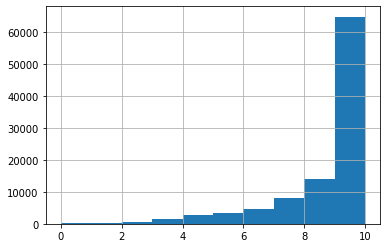

In [10]:
hdf_results["number_of_steps"].hist()

<AxesSubplot:>

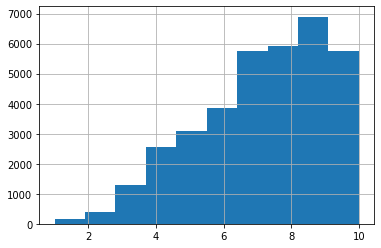

In [11]:
# get solved molecules
solved_molecules = hdf_results[hdf_results["is_solved"] == True]
solved_molecules["number_of_steps"].hist()

## calculate results on desired molecules

In [14]:
dataframe_with_values = "<PATH>/led3_score/data/results/3_molecular_generation/generated_molecules/full_model/used_scorer/Led3_caspyrus_10k/generated_molecules/caspyrus10k_led3score/Q99685_casp10k_led3score_400ep_final_cleaned.csv"
dataframe_with_values = pandas.read_csv(dataframe_with_values)
dataframe_with_values.head()

,LED3Scorer,XGBClassifier,XGBRegressor,SMILES,clean_smiles,SMILES_inchi,clean_smiles_inchi
0,0.992235,0.937812,7.492107,O=C(OC(C(F)(F)F)C(F)(F)F)N1CCN(Cc2ccccc2)CC1,O=C(OC(C(F)(F)F)C(F)(F)F)N1CCN(Cc2ccccc2)CC1,"InChI=1S/C15H16F6N2O2/c16-14(17,18)12(15(19,20...","InChI=1S/C15H16F6N2O2/c16-14(17,18)12(15(19,20..."
1,0.077478,0.770290,7.076711,O=C(N1CCC(c2ccccc2CC(Cl)C=CC2(F)NNC2=S)CC1)n1n...,O=C(N1CCC(c2ccccc2CC(Cl)C=CC2(F)NNC2=S)CC1)n1n...,InChI=1S/C24H24ClFN6OS/c25-18(9-12-24(26)22(34...,InChI=1S/C24H24ClFN6OS/c25-18(9-12-24(26)22(34...
2,0.992030,0.985115,7.683101,O=C(N1CCN(Cc2cnccc2-c2ccccc2)CC1)n1nnc2ccccc21,O=C(N1CCN(Cc2cnccc2-c2ccccc2)CC1)n1nnc2ccccc21,InChI=1S/C23H22N6O/c30-23(29-22-9-5-4-8-21(22)...,InChI=1S/C23H22N6O/c30-23(29-22-9-5-4-8-21(22)...
3,0.963109,0.980058,7.612744,O=C(Cc1ccc2scnc2c1)CN1CCN(C(=O)n2nnc3ccccc32)CC1,O=C(Cc1ccc2scnc2c1)CN1CCN(C(=O)n2nnc3ccccc32)CC1,InChI=1S/C21H20N6O2S/c28-16(11-15-5-6-20-18(12...,InChI=1S/C21H20N6O2S/c28-16(11-15-5-6-20-18(12...
4,0.811940,0.943419,7.114255,O=Cn1nnc(CN2CCN(C(=O)n3nnc4ccccc43)CC2)n1,O=Cn1nnc(CN2CCN(C(=O)n3nnc4ccccc43)CC2)n1,InChI=1S/C14H15N9O2/c24-10-22-17-13(16-18-22)9...,InChI=1S/C14H15N9O2/c24-10-22-17-13(16-18-22)9...


In [15]:
# assert that the target column is the same for azf_results and csv_result
assert (hdf_results["target"] == dataframe_with_values["clean_smiles"]).all(), "The target column and clean_smiles columns are not the same"

AssertionError: The target column and clean_smiles columns are not the same

In [16]:
# get the differences between the target and clean smiles
hdf_results[hdf_results["target"] != dataframe_with_values["clean_smiles"]]

,target,search_time,first_solution_time,first_solution_iteration,number_of_nodes,max_transforms,max_children,number_of_routes,number_of_solved_routes,top_score,...,number_of_steps,number_of_precursors,number_of_precursors_in_stock,precursors_in_stock,precursors_not_in_stock,precursors_availability,policy_used_counts,profiling,top_scores,trees
45478,O=CC1CCN(C(=O)C2CCCN(C3CCCCC34C3=CC=NC4=N3)C2)CC1,902.158719,0.0,0,5410,10,36,485,0,0.863760,...,10,11,10,"BrCc1ccccc1, OCCO, BrCc1ccccc1, CCOC(=O)C1CCNC...",O=C(O)C1CCCC2(C1=O)C1=CC(F)=NC2=N1,led3;led3;led3;led3;led3;led3;led3;led3;led3;l...,{'uspto': 5409},"{'expansion_calls': 4925, 'reactants_generatio...","0.8638, 0.8553, 0.8553, 0.8551, 0.8448, 0.8448...","[{'type': 'mol', 'hide': False, 'smiles': 'O=C..."
78620,CCC12C34CCCC5C6CC53C(CCC3C(C5=c7oc(nc7=CC=CC(=...,900.110246,0.0,0,5502,10,51,1821,0,0.831585,...,9,8,7,"N, C=CC=O, O=CCCl, CCOC(=O)C#N, C=CCCO, Cc1ccc...",C=CC1=c2oc3nc2=CC=CC(=O)N(C(=O)OC(C)(C)C)CC(N=...,led3;led3;led3;led3;led3;led3;Not in stock;led3,{'uspto': 5501},"{'expansion_calls': 3686, 'reactants_generatio...","0.8316, 0.8314, 0.8314, 0.8314, 0.8167","[{'type': 'mol', 'hide': False, 'smiles': 'CCC..."


In [17]:
# calculate the inchis for the target column
from rdkit import Chem

def calculate_inchi(smiles):
    mol = Chem.MolFromSmiles(smiles)
    inchi = Chem.MolToInchi(mol)
    return inchi

hdf_results["target_inchi"] = hdf_results["target"].apply(calculate_inchi)

In [18]:
# do a compariosn between the target column and the clean_smiles column on inchi basis because smiles are disambigious
assert (hdf_results["target_inchi"] == dataframe_with_values["clean_smiles_inchi"]).all(), "The target column and clean_smiles columns INCHIS are not the same"
hdf_results[hdf_results["target_inchi"] != dataframe_with_values["clean_smiles_inchi"]]
#print the unique length and the normal length of the inchi column
print("The unique length of the inchi column: ", len(hdf_results["target_inchi"].unique()))
print("The normal length of the inchi column: ", len(hdf_results["target_inchi"]))

print("No join possible!")

,target,search_time,first_solution_time,first_solution_iteration,number_of_nodes,max_transforms,max_children,number_of_routes,number_of_solved_routes,top_score,...,number_of_precursors,number_of_precursors_in_stock,precursors_in_stock,precursors_not_in_stock,precursors_availability,policy_used_counts,profiling,top_scores,trees,target_inchi


In [21]:
# add the dataframe_with_values to the hdf_results for the columns LED3Scorer XGBClassifier	XGBRegressor clean_smiles_inchi
hdf_results["LED3Scorer"] = dataframe_with_values["LED3Scorer"]
hdf_results["XGBClassifier"] = dataframe_with_values["XGBClassifier"]
hdf_results["XGBRegressor"] = dataframe_with_values["XGBRegressor"]
hdf_results["clean_smiles_inchi"] = dataframe_with_values["clean_smiles_inchi"]

assert (hdf_results["target_inchi"] == hdf_results["clean_smiles_inchi"]).all(), "The target column and clean_smiles columns INCHIS are not the same"

hdf_results.head()

,target,search_time,first_solution_time,first_solution_iteration,number_of_nodes,max_transforms,max_children,number_of_routes,number_of_solved_routes,top_score,...,precursors_availability,policy_used_counts,profiling,top_scores,trees,target_inchi,LED3Scorer,XGBClassifier,XGBRegressor,clean_smiles_inchi
0,O=C(OC(C(F)(F)F)C(F)(F)F)N1CCN(Cc2ccccc2)CC1,0.868079,0.868016,1,4,3,1,1,1,0.986553,...,led3;led3;led3;led3,{'uspto': 3},"{'expansion_calls': 3, 'reactants_generations'...","0.9866, 0.6810, 0.6774, 0.0491","[{'type': 'mol', 'hide': False, 'smiles': 'O=C...","InChI=1S/C15H16F6N2O2/c16-14(17,18)12(15(19,20...",0.992235,0.937812,7.492107,"InChI=1S/C15H16F6N2O2/c16-14(17,18)12(15(19,20..."
1,O=C(N1CCC(c2ccccc2CC(Cl)C=CC2(F)NNC2=S)CC1)n1n...,900.979861,0.000000,0,7029,10,23,2431,0,0.855899,...,led3;led3;led3;led3;led3;led3;led3;led3;led3;N...,{'uspto': 7028},"{'expansion_calls': 4598, 'reactants_generatio...","0.8559, 0.8553, 0.8551, 0.8468, 0.8468, 0.8468...","[{'type': 'mol', 'hide': False, 'smiles': 'O=C...",InChI=1S/C24H24ClFN6OS/c25-18(9-12-24(26)22(34...,0.077478,0.770290,7.076711,InChI=1S/C24H24ClFN6OS/c25-18(9-12-24(26)22(34...
2,O=C(N1CCN(Cc2cnccc2-c2ccccc2)CC1)n1nnc2ccccc21,17.310348,17.310285,5,69,10,5,22,1,0.963447,...,led3;led3;led3;led3;led3;led3,{'uspto': 68},"{'expansion_calls': 49, 'reactants_generations...","0.9634, 0.8202, 0.8152, 0.8146, 0.8144, 0.8144...","[{'type': 'mol', 'hide': False, 'smiles': 'O=C...",InChI=1S/C23H22N6O/c30-23(29-22-9-5-4-8-21(22)...,0.992030,0.985115,7.683101,InChI=1S/C23H22N6O/c30-23(29-22-9-5-4-8-21(22)...
3,O=C(Cc1ccc2scnc2c1)CN1CCN(C(=O)n2nnc3ccccc32)CC1,446.860759,446.860670,211,2530,10,23,435,1,0.975000,...,led3;led3;led3;led3;led3;led3,{'uspto': 2529},"{'expansion_calls': 2106, 'reactants_generatio...","0.9750, 0.8446, 0.8446, 0.8336, 0.8336","[{'type': 'mol', 'hide': False, 'smiles': 'O=C...",InChI=1S/C21H20N6O2S/c28-16(11-15-5-6-20-18(12...,0.963109,0.980058,7.612744,InChI=1S/C21H20N6O2S/c28-16(11-15-5-6-20-18(12...
4,O=Cn1nnc(CN2CCN(C(=O)n3nnc4ccccc43)CC2)n1,900.869223,0.000000,0,2633,10,22,691,0,0.844779,...,led3;led3;led3;led3;led3;led3;led3;led3;Not in...,{'uspto': 2632},"{'expansion_calls': 2027, 'reactants_generatio...","0.8448, 0.8446, 0.8446, 0.8446, 0.8446, 0.8446","[{'type': 'mol', 'hide': False, 'smiles': 'O=C...",InChI=1S/C14H15N9O2/c24-10-22-17-13(16-18-22)9...,0.811940,0.943419,7.114255,InChI=1S/C14H15N9O2/c24-10-22-17-13(16-18-22)9...


## confusion matrix

The accuracy:  0.69563
The precision:  0.5450095837897043
The recall:  0.8921197859764126
The f1 score:  0.6766458795907744
The mcc:  0.46533274574261996


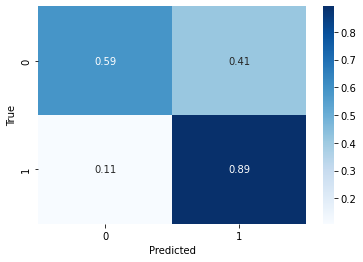

In [45]:
predicted_solved = hdf_results["LED3Scorer"] > 0.5
solved = hdf_results["is_solved"]

# calculate the accuracy
from sklearn.metrics import accuracy_score
print("The accuracy: ", accuracy_score(solved, predicted_solved))

# calculate the precision
from sklearn.metrics import precision_score
print("The precision: ", precision_score(solved, predicted_solved))

# calculate the recall
from sklearn.metrics import recall_score
print("The recall: ", recall_score(solved, predicted_solved))

# calculate the f1 score
from sklearn.metrics import f1_score
print("The f1 score: ", f1_score(solved, predicted_solved))

# calculate the mcc
from sklearn.metrics import matthews_corrcoef
print("The mcc: ", matthews_corrcoef(solved, predicted_solved))

# visualize the confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# normalized

confusion_matrix = confusion_matrix(solved, predicted_solved)
confusion_matrix = confusion_matrix.astype('float') / confusion_matrix.sum(axis=1)[:, numpy.newaxis]
sns.heatmap(confusion_matrix, annot=True, cmap="Blues", fmt=".2f")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


In [ ]:
## clustering

In [22]:
from multiretro.data.logic.fingerprints.fingerprints import BinaryMorganFingerprint
from multiretro.data.logic.fingerprints.fingerprint_generator import FingerprintGenerator
from multiretro.visualization.logic.umapVisualization import UmapVisualizer

# generate fingerprints
morganFingerprint = BinaryMorganFingerprint(transform_to_numpy_array=False, radius=2, number_of_bits= 1024, use_features= False)
fingerprint_generator = FingerprintGenerator(fingerprint = morganFingerprint)
clustered_azf_results = fingerprint_generator.create_fingerprints_pandas_dataframe(data_frame = hdf_results, smiles_column = "target", fingerprint_column = "fingerprint")

umapVisualizer = UmapVisualizer(dataFrame=clustered_azf_results, dimensions=2)
umapVisualizer.transformRdkitColumn2NumpyArray(columnName="fingerprint", newColumnName="fingerprint_numpy_array")
umapVisualizer.transformNumpyArrayColumnn2NumpyMatrix(columnName="fingerprint_numpy_array")
umapVisualizer.calculateUmapMapper()
umapVisualizer.extractUmapEmbeddings()
#umapVisualizer.calculateMarkerSize(boolean_row = "Centroid")
umapDataFrame = umapVisualizer.getVisualizationDataFrame()
umapDataFrame = umapDataFrame.reset_index(drop = True)

# multiply the max_transforms by -1
umapDataFrame["number_of_steps_marker"] = umapDataFrame["number_of_steps"] * -1

# minmax scale the max_transforms_marker column
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(5, 25))
umapDataFrame["number_of_steps_marker"] = scaler.fit_transform(umapDataFrame[["number_of_steps_marker"]])
umapDataFrame["real_index"] = umapDataFrame.index.to_list()

# visualize the molecules
umapVisualizer = UmapVisualizer(dataFrame=umapDataFrame)
app = umapVisualizer.createMolPlotlyVisualization(smilesColumn = 'target', maximumMarkerSize = 25, size = "number_of_steps_marker", colorColumn = "is_solved", captionColumns = ["real_index", "is_solved","target","number_of_steps","LED3Scorer","XGBClassifier","XGBRegressor"])
app.run_server(mode='jupyterlab',host='0.0.0.0', port=8000, debug=False, proxy=None, use_reloader=False)


KeyboardInterrupt: 

In [ ]:
print(umapDataFrame.columns)

umapDataFrame = umapDataFrame.drop(columns=['trees', 'fingerprint', 'fingerprint_numpy_array'])
print(len(umapDataFrame))
umapDataFrame.head()

In [ ]:
save_path = "<PATH>/led3_score/data/results/3_molecular_generation/generated_molecules/full_model/used_scorer/Led3_caspyrus_10k/planning_results/led3_building_blocks/full_model/used_scorer/Led3_caspyrus_10k/Led3_BB_Q99685_casp10k_led3score_400ep_final_FULL.csv"
#umapDataFrame.to_csv(save_path)

## desired molecules (LED3Scorer, XGBClassifier > 0.8)

In [24]:
xgb_molecules = hdf_results[hdf_results["XGBClassifier"] > 0.8]
print("The number of molecules with a XGBClassifier score higher than 0.8: ", len(xgb_molecules))
led3_molecules = hdf_results[hdf_results["LED3Scorer"] > 0.8]
print("The number of molecules with a LED3 score higher than 0.8: ", len(led3_molecules))
short_list = hdf_results[(hdf_results["LED3Scorer"] > 0.8) & (hdf_results["XGBClassifier"] > 0.8)]
print("The number of molecules with a LED3 score higher than 0.8 and a XGBClassifier score higher than 0.8: ", len(short_list))

The number of molecules with a XGBClassifier score higher than 0.8:  67407
The number of molecules with a LED3 score higher than 0.8:  48093
The number of molecules with a LED3 score higher than 0.8 and a XGBClassifier score higher than 0.8:  32907


In [30]:
# reset index
short_list = short_list.reset_index(drop = True)
short_list.head()

,target,search_time,first_solution_time,first_solution_iteration,number_of_nodes,max_transforms,max_children,number_of_routes,number_of_solved_routes,top_score,...,precursors_availability,policy_used_counts,profiling,top_scores,trees,target_inchi,LED3Scorer,XGBClassifier,XGBRegressor,clean_smiles_inchi
0,O=C(OC(C(F)(F)F)C(F)(F)F)N1CCN(Cc2ccccc2)CC1,0.868079,0.868016,1,4,3,1,1,1,0.986553,...,led3;led3;led3;led3,{'uspto': 3},"{'expansion_calls': 3, 'reactants_generations'...","0.9866, 0.6810, 0.6774, 0.0491","[{'type': 'mol', 'hide': False, 'smiles': 'O=C...","InChI=1S/C15H16F6N2O2/c16-14(17,18)12(15(19,20...",0.992235,0.937812,7.492107,"InChI=1S/C15H16F6N2O2/c16-14(17,18)12(15(19,20..."
1,O=C(N1CCN(Cc2cnccc2-c2ccccc2)CC1)n1nnc2ccccc21,17.310348,17.310285,5,69,10,5,22,1,0.963447,...,led3;led3;led3;led3;led3;led3,{'uspto': 68},"{'expansion_calls': 49, 'reactants_generations...","0.9634, 0.8202, 0.8152, 0.8146, 0.8144, 0.8144...","[{'type': 'mol', 'hide': False, 'smiles': 'O=C...",InChI=1S/C23H22N6O/c30-23(29-22-9-5-4-8-21(22)...,0.992030,0.985115,7.683101,InChI=1S/C23H22N6O/c30-23(29-22-9-5-4-8-21(22)...
2,O=C(Cc1ccc2scnc2c1)CN1CCN(C(=O)n2nnc3ccccc32)CC1,446.860759,446.860670,211,2530,10,23,435,1,0.975000,...,led3;led3;led3;led3;led3;led3,{'uspto': 2529},"{'expansion_calls': 2106, 'reactants_generatio...","0.9750, 0.8446, 0.8446, 0.8336, 0.8336","[{'type': 'mol', 'hide': False, 'smiles': 'O=C...",InChI=1S/C21H20N6O2S/c28-16(11-15-5-6-20-18(12...,0.963109,0.980058,7.612744,InChI=1S/C21H20N6O2S/c28-16(11-15-5-6-20-18(12...
3,O=Cn1nnc(CN2CCN(C(=O)n3nnc4ccccc43)CC2)n1,900.869223,0.000000,0,2633,10,22,691,0,0.844779,...,led3;led3;led3;led3;led3;led3;led3;led3;Not in...,{'uspto': 2632},"{'expansion_calls': 2027, 'reactants_generatio...","0.8448, 0.8446, 0.8446, 0.8446, 0.8446, 0.8446","[{'type': 'mol', 'hide': False, 'smiles': 'O=C...",InChI=1S/C14H15N9O2/c24-10-22-17-13(16-18-22)9...,0.811940,0.943419,7.114255,InChI=1S/C14H15N9O2/c24-10-22-17-13(16-18-22)9...
4,O=C(c1ccc(Sc2ccccc2)cc1)C1CCN(C(=O)c2cc(O)ccc2...,2.026493,2.026420,1,15,7,2,2,1,0.952371,...,led3;led3;led3;led3;led3;led3;led3;led3;led3,{'uspto': 14},"{'expansion_calls': 13, 'reactants_generations...","0.9524, 0.8336, 0.8336, 0.8167, 0.7940","[{'type': 'mol', 'hide': False, 'smiles': 'O=C...",InChI=1S/C25H22FNO3S/c26-23-11-8-19(28)16-22(2...,0.993937,0.978803,7.646267,InChI=1S/C25H22FNO3S/c26-23-11-8-19(28)16-22(2...


In [31]:
provided_short_list = "<PATH>/led3_score/data/results/3_molecular_generation/generated_molecules/full_model/used_scorer/Led3_caspyrus_10k/generated_molecules/caspyrus10k_led3score/Q99685_casp10k_led3score_400ep_final_shortlist_cleaned.csv"
provided_short_list = pandas.read_csv(provided_short_list)
provided_short_list.head()


,SMILES,LED3Scorer,XGBClassifier,XGBRegressor,closest_training_molecule_similarity,closest_training_molecule,clean_smiles,SMILES_inchi,clean_smiles_inchi
0,O=C(OC(C(F)(F)F)C(F)(F)F)N1CCN(Cc2ccccc2)CC1,0.992235,0.937812,7.492107,0.701754,O=C(OC(C(F)(F)F)C(F)(F)F)N1CCN(Cc2ccc(Cl)cc2)CC1,O=C(OC(C(F)(F)F)C(F)(F)F)N1CCN(Cc2ccccc2)CC1,"InChI=1S/C15H16F6N2O2/c16-14(17,18)12(15(19,20...","InChI=1S/C15H16F6N2O2/c16-14(17,18)12(15(19,20..."
1,O=C(N1CCN(Cc2cnccc2-c2ccccc2)CC1)n1nnc2ccccc21,0.992030,0.985115,7.683101,0.705882,O=C(N1CCN(Cc2ccccc2-c2ccccc2)CC1)n1nnc2c1cccc2,O=C(N1CCN(Cc2cnccc2-c2ccccc2)CC1)n1nnc2ccccc21,InChI=1S/C23H22N6O/c30-23(29-22-9-5-4-8-21(22)...,InChI=1S/C23H22N6O/c30-23(29-22-9-5-4-8-21(22)...
2,O=C(Cc1ccc2scnc2c1)CN1CCN(C(=O)n2nnc3ccccc32)CC1,0.963109,0.980058,7.612744,0.494624,O=C(N1CCN(Cc2ccc(Cl)cc2)CC1)n1nnc2c1cccc2,O=C(Cc1ccc2scnc2c1)CN1CCN(C(=O)n2nnc3ccccc32)CC1,InChI=1S/C21H20N6O2S/c28-16(11-15-5-6-20-18(12...,InChI=1S/C21H20N6O2S/c28-16(11-15-5-6-20-18(12...
3,O=Cn1nnc(CN2CCN(C(=O)n3nnc4ccccc43)CC2)n1,0.811940,0.943419,7.114255,0.626667,O=C(N1CCN(Cc2ccccc2)CC1)n1nnc2c1cccc2,O=Cn1nnc(CN2CCN(C(=O)n3nnc4ccccc43)CC2)n1,InChI=1S/C14H15N9O2/c24-10-22-17-13(16-18-22)9...,InChI=1S/C14H15N9O2/c24-10-22-17-13(16-18-22)9...
4,O=C(c1ccc(Sc2ccccc2)cc1)C1CCN(C(=O)c2cc(O)ccc2...,0.993937,0.978803,7.646267,1.000000,O=C(c1ccc(Sc2ccccc2)cc1)C1CCN(C(=O)c2cc(O)ccc2...,O=C(c1ccc(Sc2ccccc2)cc1)C1CCN(C(=O)c2cc(O)ccc2...,InChI=1S/C25H22FNO3S/c26-23-11-8-19(28)16-22(2...,InChI=1S/C25H22FNO3S/c26-23-11-8-19(28)16-22(2...


In [32]:
# assert that the short_list and provided_short_list are the same target_inchi and clean_smiles_inchi
assert (short_list["target_inchi"] == provided_short_list["clean_smiles_inchi"]).all(), "The target column and clean_smiles columns INCHIS are not the same"

In [33]:
short_list["closest_training_molecule_similarity"] = provided_short_list["closest_training_molecule_similarity"]
short_list["closest_training_molecule"] = provided_short_list["closest_training_molecule"]
short_list.head()

,target,search_time,first_solution_time,first_solution_iteration,number_of_nodes,max_transforms,max_children,number_of_routes,number_of_solved_routes,top_score,...,profiling,top_scores,trees,target_inchi,LED3Scorer,XGBClassifier,XGBRegressor,clean_smiles_inchi,closest_training_molecule_similarity,closest_training_molecule
0,O=C(OC(C(F)(F)F)C(F)(F)F)N1CCN(Cc2ccccc2)CC1,0.868079,0.868016,1,4,3,1,1,1,0.986553,...,"{'expansion_calls': 3, 'reactants_generations'...","0.9866, 0.6810, 0.6774, 0.0491","[{'type': 'mol', 'hide': False, 'smiles': 'O=C...","InChI=1S/C15H16F6N2O2/c16-14(17,18)12(15(19,20...",0.992235,0.937812,7.492107,"InChI=1S/C15H16F6N2O2/c16-14(17,18)12(15(19,20...",0.701754,O=C(OC(C(F)(F)F)C(F)(F)F)N1CCN(Cc2ccc(Cl)cc2)CC1
1,O=C(N1CCN(Cc2cnccc2-c2ccccc2)CC1)n1nnc2ccccc21,17.310348,17.310285,5,69,10,5,22,1,0.963447,...,"{'expansion_calls': 49, 'reactants_generations...","0.9634, 0.8202, 0.8152, 0.8146, 0.8144, 0.8144...","[{'type': 'mol', 'hide': False, 'smiles': 'O=C...",InChI=1S/C23H22N6O/c30-23(29-22-9-5-4-8-21(22)...,0.992030,0.985115,7.683101,InChI=1S/C23H22N6O/c30-23(29-22-9-5-4-8-21(22)...,0.705882,O=C(N1CCN(Cc2ccccc2-c2ccccc2)CC1)n1nnc2c1cccc2
2,O=C(Cc1ccc2scnc2c1)CN1CCN(C(=O)n2nnc3ccccc32)CC1,446.860759,446.860670,211,2530,10,23,435,1,0.975000,...,"{'expansion_calls': 2106, 'reactants_generatio...","0.9750, 0.8446, 0.8446, 0.8336, 0.8336","[{'type': 'mol', 'hide': False, 'smiles': 'O=C...",InChI=1S/C21H20N6O2S/c28-16(11-15-5-6-20-18(12...,0.963109,0.980058,7.612744,InChI=1S/C21H20N6O2S/c28-16(11-15-5-6-20-18(12...,0.494624,O=C(N1CCN(Cc2ccc(Cl)cc2)CC1)n1nnc2c1cccc2
3,O=Cn1nnc(CN2CCN(C(=O)n3nnc4ccccc43)CC2)n1,900.869223,0.000000,0,2633,10,22,691,0,0.844779,...,"{'expansion_calls': 2027, 'reactants_generatio...","0.8448, 0.8446, 0.8446, 0.8446, 0.8446, 0.8446","[{'type': 'mol', 'hide': False, 'smiles': 'O=C...",InChI=1S/C14H15N9O2/c24-10-22-17-13(16-18-22)9...,0.811940,0.943419,7.114255,InChI=1S/C14H15N9O2/c24-10-22-17-13(16-18-22)9...,0.626667,O=C(N1CCN(Cc2ccccc2)CC1)n1nnc2c1cccc2
4,O=C(c1ccc(Sc2ccccc2)cc1)C1CCN(C(=O)c2cc(O)ccc2...,2.026493,2.026420,1,15,7,2,2,1,0.952371,...,"{'expansion_calls': 13, 'reactants_generations...","0.9524, 0.8336, 0.8336, 0.8167, 0.7940","[{'type': 'mol', 'hide': False, 'smiles': 'O=C...",InChI=1S/C25H22FNO3S/c26-23-11-8-19(28)16-22(2...,0.993937,0.978803,7.646267,InChI=1S/C25H22FNO3S/c26-23-11-8-19(28)16-22(2...,1.000000,O=C(c1ccc(Sc2ccccc2)cc1)C1CCN(C(=O)c2cc(O)ccc2...


In [34]:
# print the number of molecules in the short list
print("The number of molecules in the short list: ", len(short_list))

# get the number of molecules in the short list that are solved
print("The number of molecules in the short list that are solved:", len(short_list[short_list["is_solved"] == True]))

# percentage of solved molecules in the short list
print("The percentage of solved molecules in the short list: ", len(short_list[short_list["is_solved"] == True]) / len(short_list))

The number of molecules in the short list:  32907
The number of molecules in the short list that are solved: 20055
The percentage of solved molecules in the short list:  0.6094447989789407


<AxesSubplot:>

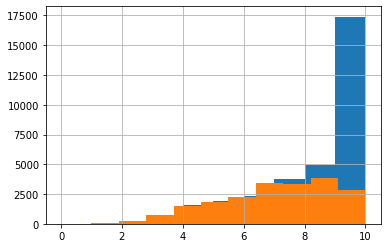

In [35]:
# hist of the number of steps for the short list
short_list["number_of_steps"].hist()

# hist in the short list that are solved
short_list[short_list["is_solved"] == True]["number_of_steps"].hist()

<AxesSubplot:>

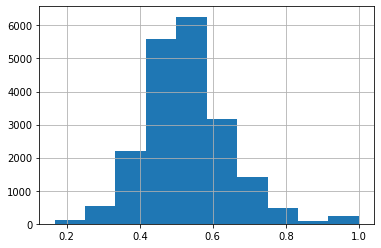

In [36]:
short_list[short_list["is_solved"] == True]["closest_training_molecule_similarity"].hist()

In [37]:
# solved and tanimoto similarity < 0.6

short_list["solved_and_unique"] = short_list["is_solved"] & (short_list["closest_training_molecule_similarity"] < 0.6)

# get index 9779 row
short_list[short_list.index == 9779]

,target,search_time,first_solution_time,first_solution_iteration,number_of_nodes,max_transforms,max_children,number_of_routes,number_of_solved_routes,top_score,...,top_scores,trees,target_inchi,LED3Scorer,XGBClassifier,XGBRegressor,clean_smiles_inchi,closest_training_molecule_similarity,closest_training_molecule,solved_and_unique
9779,Nc1nc2cc(CC(=O)n3nnc4ccccc43)ccc2s1,3.540595,3.540511,3,24,10,3,3,1,0.986553,...,"0.9866, 0.7609, 0.7603, 0.7601, 0.7185","[{'type': 'mol', 'hide': False, 'smiles': 'Nc1...",InChI=1S/C15H11N5OS/c16-15-17-11-7-9(5-6-13(11...,0.9763,0.816688,6.732847,InChI=1S/C15H11N5OS/c16-15-17-11-7-9(5-6-13(11...,0.333333,O=C(NCCc1ccc(O)c(O)c1)n1nnc2c1cccc2,True


## umap clustering

In [ ]:
from multiretro.data.logic.fingerprints.fingerprints import BinaryMorganFingerprint
from multiretro.data.logic.fingerprints.fingerprint_generator import FingerprintGenerator
from multiretro.visualization.logic.umapVisualization import UmapVisualizer

# generate fingerprints
morganFingerprint = BinaryMorganFingerprint(transform_to_numpy_array=False, radius=2, number_of_bits= 1024, use_features= False)
fingerprint_generator = FingerprintGenerator(fingerprint = morganFingerprint)
clustered_azf_results = fingerprint_generator.create_fingerprints_pandas_dataframe(data_frame = short_list, smiles_column = "target", fingerprint_column = "fingerprint")

umapVisualizer = UmapVisualizer(dataFrame=clustered_azf_results, dimensions=2)
umapVisualizer.transformRdkitColumn2NumpyArray(columnName="fingerprint", newColumnName="fingerprint_numpy_array")
umapVisualizer.transformNumpyArrayColumnn2NumpyMatrix(columnName="fingerprint_numpy_array")
umapVisualizer.calculateUmapMapper()
umapVisualizer.extractUmapEmbeddings()
#umapVisualizer.calculateMarkerSize(boolean_row = "Centroid")
umapDataFrame = umapVisualizer.getVisualizationDataFrame()
umapDataFrame = umapDataFrame.reset_index(drop = True)

# multiply the max_transforms by -1
umapDataFrame["number_of_steps_marker"] = umapDataFrame["number_of_steps"] * -1

# minmax scale the max_transforms_marker column
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(5, 25))
umapDataFrame["number_of_steps_marker"] = scaler.fit_transform(umapDataFrame[["number_of_steps_marker"]])
umapDataFrame["real_index"] = umapDataFrame.index.to_list()

# visualize the molecules
umapVisualizer = UmapVisualizer(dataFrame=umapDataFrame)
app = umapVisualizer.createMolPlotlyVisualization(smilesColumn = 'target', maximumMarkerSize = 25, size = "number_of_steps_marker", colorColumn = "solved_and_unique", captionColumns = ["real_index", "is_solved","target","number_of_steps","LED3Scorer","XGBClassifier","XGBRegressor", "closest_training_molecule_similarity", "closest_training_molecule"])
app.run_server(mode='jupyterlab',host='0.0.0.0', port=8000, debug=False, proxy=None, use_reloader=False)


# On Alice: ssh -L 8000:localhost:8000 node802
# At Home: ssh -L 8000:localhost:8000 hpc1


In [38]:
print(umapDataFrame.columns)

NameError: name 'umapDataFrame' is not defined

In [ ]:
print(umapDataFrame.columns)

# remove 'trees', 'molecule_results', 'fingerprint', 'fingerprint_numpy_array', columns
#umapDataFrame = umapDataFrame.drop(columns=['trees', 'fingerprint', 'fingerprint_numpy_array'])
umapDataFrame = umapDataFrame.drop(columns=['index'])
umapDataFrame.head()

In [ ]:
#umapDataFrame.to_csv("<PATH>/led3_score/data/results/3_molecular_generation/generated_molecules/full_model/used_scorer/Led3_caspyrus_10k/planning_results/led3/full_model/used_scorer/Led3_caspyrus_10k/Led3_BB_Q99685_casp10k_led3score_400ep_final_shortlist.csv")